In [72]:
import pandas as pd


METRIC_SET_MAPPING = {
    "none": "NONE",
    "all-non-null-numeric": "ALL",
    "pydriller": "PyD",
    "product": "PD",
    "process": "PR",
    "javametrics-numeric": "JM",
    "javametrics2": "JM2",
    "javametrics2-process": "JM2R",
    "javametrics2-product": "JM2D",
    "pmd": "PMD",
    "minimal-good": "MG",
    "best-mcc": "BC",
    "best-precision": "BP"
}

MODEL_NAME_MAPPING = {
    "basic-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB",
    "unscaled-XGB": "XGB",
    "unscaled-LGBM": "LBGM",
    "unscaled-catboost-05": "CB",
}


partial_results = [
    "../../data/experiment1-final/r_1.csv",
    "../../data/experiment1-final/r_2.csv",
    "../../data/experiment1-final/r_3.csv",
    "../../data/experiment1-final/r_4.csv",
    "../../data/experiment1-final/r_5.csv",
    "../../data/experiment1-final/r_6.csv",
    "../../data/experiment1-final/r_7.csv",
    "../../data/experiment1-final/r_8.csv",
    "../../data/experiment1-final/r_9.csv",
    "../../data/experiment1-final/r_10.csv",
    "../../data/experiment1-final/r_11.csv",
    "../../data/experiment1-final/r_12.csv",
    "../../data/experiment1-final/r_13-gb.csv",
    "../../data/experiment1-final/r_14-cb.csv"
]

results = pd.concat([pd.read_csv(filepath_or_buffer=p, sep=',') for p in partial_results])

description = results.groupby(["model_type", "metric_set", "smell_models"]).describe()

description = results.filter(["model_type", "metric_set", "smell_models", "real_mcc", "real_precision"]).groupby(["model_type", "smell_models", "metric_set"]).describe()
description

real_mcc            \
                                                           count      mean   
model_type            smell_models metric_set                                
basic-adaboost        False        all-non-null-numeric     12.0  0.452991   
                                   javametrics-numeric      12.0  0.260791   
                                   javametrics2             12.0  0.308513   
                                   javametrics2-process     12.0  0.304139   
                                   javametrics2-product     12.0  0.253700   
...                                                          ...       ...   
unscaled-randomforest True         none                     12.0  0.224693   
                                   pmd                      12.0  0.333742   
                                   process                   8.0  0.525524   
                                   product                  12.0  0.348547   
                                   pydriller                12.0  0.485380   

                                                                             \
                                                              std       min   
model_type            smell_models metric_set                                 
basic-adaboost        False        all-non-null-numeric  0.004838  0.446486   
                                   javametrics-numeric   0.008125  0.249027   
                                   javametrics2          0.006803  0.296663   
                                   javametrics2-process  0.038949  0.189873   
                                   javametrics2-product  0.004719  0.246321   
...                                                           ...       ...   
unscaled-randomforest True         none                  0.004287  0.218772   
                                   pmd                   0.006567  0.324657   
                                   process               0.007984  0.513415   
                                   product               0.005254  0.338305   
                                   pydriller             0.007421  0.472943   

                                                                             \
                                                              25%       50%   
model_type            smell_models metric_set                                 
basic-adaboost        False        all-non-null-numeric  0.448368  0.453821   
                                   javametrics-numeric   0.256202  0.259336   
                                   javametrics2          0.303776  0.308001   
                                   javametrics2-process  0.303228  0.308443   
                                   javametrics2-product  0.250804  0.252849   
...                                                           ...       ...   
unscaled-randomforest True         none                  0.220510  0.225874   
                                   pmd                   0.328891  0.333008   
                                   process               0.521832  0.526861   
                                   product               0.346268  0.348100   
                                   pydriller             0.480115  0.485638   

                                                                             \
                                                              75%       max   
model_type            smell_models metric_set                                 
basic-adaboost        False        all-non-null-numeric  0.454994  0.461382   
                                   javametrics-numeric   0.262044  0.281391   
                                   javametrics2          0.312224  0.318928   
                                   javametrics2-process  0.318487  0.352639   
                                   javametrics2-product  0.256688  0.264263   
...                                                           ...       ...   
unscaled-randomforest True         non

In [73]:
series = description.filter([("real_mcc", "50%"), ("real_precision", "50%")]).reset_index()
series["MCC"] = series[("real_mcc", "50%")]
series["Precision"] = series[("real_precision", "50%")]
series = series.drop(columns=[("real_mcc", "50%"), ("real_precision", "50%")])
series["metric_set"] = series["metric_set"].map(METRIC_SET_MAPPING)
series["model_type"] = series["model_type"].map(MODEL_NAME_MAPPING)

incl_smells = series[series["smell_models"] == True].drop(columns=["smell_models"])
excl_smells = series[series["smell_models"] == False].drop(columns=["smell_models"])

final_series = incl_smells.merge(excl_smells, on=("model_type", "metric_set"), suffixes=(" (smells)", " (no smells)"))

final_series = final_series[["model_type", "metric_set", "MCC (smells)", "MCC (no smells)", "Precision (smells)", "Precision (no smells)"]]
final_series = final_series.rename(columns={"model_type": "Model", "metric_set": "Metric set"})

final_series = final_series.sort_values(by=['MCC (no smells)'], ascending=False)

final_series = final_series.reset_index(drop=True)
final_series.index += 1
final_series.style.to_latex(
    buf="performance-metrics-basic.tex",
    caption="Prediction performance measures for multi-metric scenario",
    label="Appendix:DataTableBasic",
    environment = "longtable"
)

final_series

C:\Users\Ja\AppData\Local\Temp\ipykernel_24940\134843790.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  incl_smells = series[series["smell_models"] == True].drop(columns=["smell_models"])
C:\Users\Ja\AppData\Local\Temp\ipykernel_24940\134843790.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  excl_smells = series[series["smell_models"] == False].drop(columns=["smell_models"])
C:\Users\Ja\AppData\Local\Temp\ipykernel_24940\134843790.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  final_series = incl_smells.merge(excl_smells, on=("model_type", "metric_set"), suffixes=(" (smells)", " (no smells)"))


,Model,Metric set,MCC (smells),MCC (no smells),Precision (smells),Precision (no smells)
,,,,,,
1,URF,ALL,0.536028,0.533881,0.676636,0.674929
2,CB,PR,0.534714,0.531919,0.685479,0.684804
3,CB,ALL,0.530150,0.529874,0.670737,0.672026
4,URF,PR,0.526861,0.521740,0.688910,0.688406
5,XGB,PR,0.521487,0.519480,0.674923,0.677502
...,...,...,...,...,...,...
86,LBGM,PMD,0.229477,0.198001,0.356236,0.338881
87,BGB,PMD,0.214370,0.189865,0.349626,0.334961
88,BAB,PMD,0.215458,0.184717,0.348387,0.332471


<AxesSubplot: xlabel='Metric set', ylabel='MCC'>

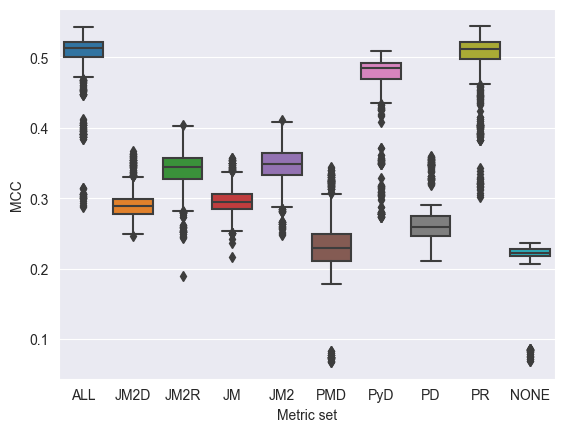

In [74]:
import seaborn as sns

metricset_data = results.filter(["real_mcc", "real_precision", "metric_set"])
metricset_data["metric_set"] = metricset_data["metric_set"].map(METRIC_SET_MAPPING)

mcc_set = sns.boxplot(
    metricset_data, y="real_mcc", x="metric_set"
)

mcc_set.set(xlabel="Metric set", ylabel="MCC")

mcc_set.get_figure().savefig("basic_mcc_set.png")
mcc_set

In [75]:
metricset_summary = metricset_data.groupby("metric_set").describe()

metricset_summary.style.to_latex("metrics-multiple.tex")

metricset_summary

real_mcc                                                    \
              count      mean       std       min       25%       50%   
metric_set                                                              
ALL           516.0  0.491371  0.056933  0.287957  0.500589  0.513323   
JM            516.0  0.296505  0.022905  0.217090  0.284446  0.295205   
JM2           516.0  0.344464  0.031915  0.248080  0.332495  0.348774   
JM2D          516.0  0.292965  0.024661  0.246321  0.278013  0.289071   
JM2R          516.0  0.339161  0.031446  0.189873  0.327164  0.343829   
NONE          258.0  0.209993  0.042229  0.069082  0.217139  0.222508   
PD            516.0  0.266417  0.034864  0.210884  0.246365  0.259649   
PMD           516.0  0.232086  0.052636  0.067348  0.210472  0.229355   
PR            501.0  0.490514  0.054671  0.302152  0.497601  0.511969   
PyD           516.0  0.458962  0.061564  0.272601  0.468571  0.484714   

                               real_precision                                \
                 75%       max          count      mean       std       min   
metric_set                                                                    
ALL         0.521441  0.543401          516.0  0.645045  0.048802  0.478503   
JM          0.305412  0.357351          516.0  0.406636  0.013152  0.355360   
JM2         0.363739  0.410716          516.0  0.430953  0.016688  0.396614   
JM2D        0.298805  0.367013          516.0  0.403285  0.015752  0.375287   
JM2R        0.357586  0.404064          516.0  0.429865  0.016346  0.338915   
NONE        0.228124  0.236331          258.0  0.457999  0.008924  0.436722   
PD          0.274335  0.359679          516.0  0.375298  0.015330  0.353569   
PMD         0.248913  0.343844          516.0  0.357087  0.022101  0.303130   
PR          0.521601  0.544677          501.0  0.656849  0.046914  0.481208   
PyD         0.491375  0.508834          516.0  0.680085  0.046254  0.501105   

                                                    
                 25%       50%       75%       max  
metric_set                                          
ALL         0.638885  0.666788  0.672453  0.688477  
JM          0.399793  0.404611  0.411646  0.449315  
JM2         0.419828  0.431587  0.442838  0.476784  
JM2D        0.393701  0.399632  0.408341  0.455389  
JM2R        0.419503  0.430220  0.440486  0.516936  
NONE        0.452512  0.457884  0.462357  0.486381  
PD          0.366434  0.370840  0.377836  0.418486  
PMD         0.347328  0.355869  0.363873  0.408790  
PR          0.647760  0.676644  0.682331  0.698620  
PyD         0.681206  0.692881  0.706424  0.731643

<AxesSubplot: xlabel='Metric set', ylabel='Precision'>

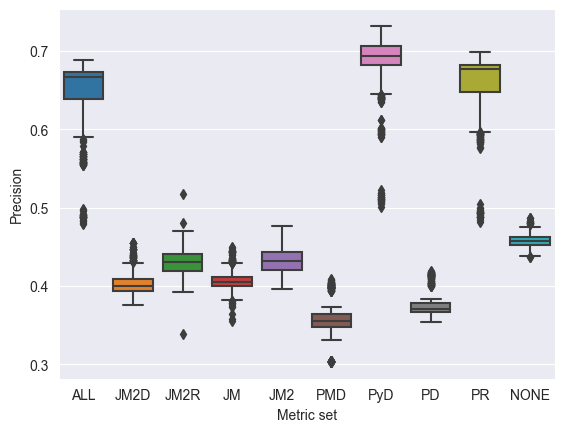

In [76]:
precision_set = sns.boxplot(
    metricset_data, y="real_precision", x="metric_set"
)


precision_set.set(xlabel="Metric set", ylabel="Precision")
precision_set.get_figure().savefig("basic_precision_set.png")
precision_set

<AxesSubplot: xlabel='ML model', ylabel='MCC'>

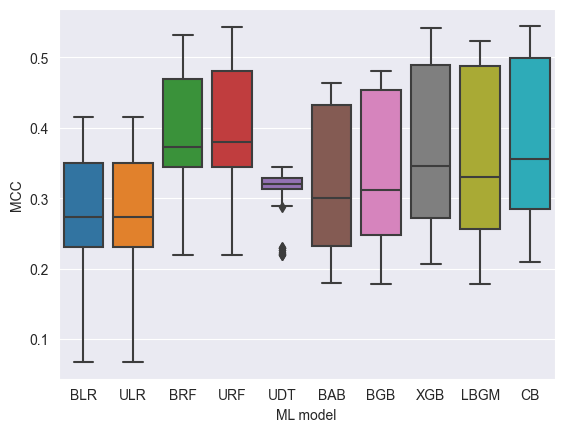

In [77]:

modeltype_data = results.filter(["real_mcc", "real_precision", "model_type"])
modeltype_data["model_type"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

model_mcc = sns.boxplot(
    modeltype_data, y="real_mcc", x="model_type"
)

model_mcc.set(xlabel="ML model", ylabel="MCC")
model_mcc.get_figure().savefig("basic_mcc_model.png")
model_mcc

<AxesSubplot: xlabel='ML model', ylabel='Precision'>

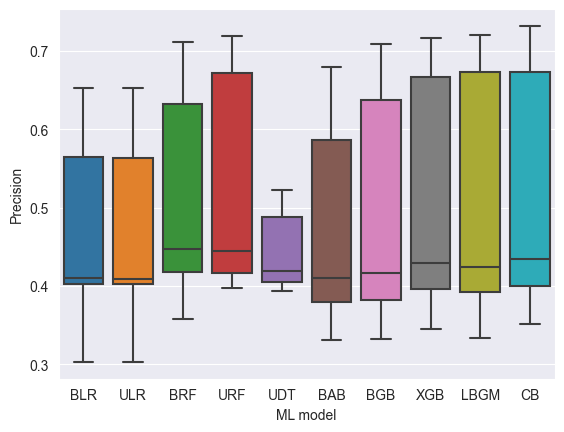

In [78]:
model_precision = sns.boxplot(
    modeltype_data, y="real_precision", x="model_type"
)

model_precision.set(xlabel="ML model", ylabel="Precision")
model_precision.get_figure().savefig("basic_precision_model.png")
model_precision

In [79]:
modelset_summary = modeltype_data.groupby("model_type").describe()

modelset_summary.style.to_latex("models-multiple.tex")

modelset_summary


real_mcc                                                    \
              count      mean       std       min       25%       50%   
model_type                                                              
BAB           228.0  0.315015  0.093287  0.179672  0.232403  0.299662   
BGB           228.0  0.327438  0.098776  0.178078  0.247687  0.311758   
BLR           228.0  0.273975  0.090530  0.067348  0.230764  0.273038   
BRF           221.0  0.392252  0.079446  0.218772  0.344608  0.372797   
CB            570.0  0.372285  0.108201  0.208840  0.284714  0.355937   
LBGM         1368.0  0.350211  0.109891  0.178338  0.255899  0.329795   
UDT           228.0  0.315434  0.024170  0.218772  0.312623  0.320674   
ULR           228.0  0.273900  0.090523  0.067348  0.230700  0.272744   
URF           220.0  0.397048  0.083674  0.218772  0.343660  0.379912   
XGB          1368.0  0.362426  0.107598  0.206472  0.271977  0.345457   

                               real_precision                                \
                 75%       max          count      mean       std       min   
model_type                                                                    
BAB         0.432623  0.463184          228.0  0.459672  0.110262  0.330767   
BGB         0.453924  0.480621          228.0  0.474717  0.125552  0.332094   
BLR         0.349651  0.415286          228.0  0.461274  0.100679  0.303130   
BRF         0.468622  0.531415          221.0  0.498136  0.106766  0.358191   
CB          0.498503  0.544677          570.0  0.498258  0.131906  0.352018   
LBGM        0.488206  0.523747         1368.0  0.489236  0.135786  0.333521   
UDT         0.328132  0.344630          228.0  0.440534  0.041511  0.393316   
ULR         0.349651  0.414773          228.0  0.461174  0.100711  0.303130   
URF         0.480712  0.543000          220.0  0.506327  0.118879  0.397721   
XGB         0.489852  0.541670         1368.0  0.491566  0.130444  0.345470   

                                                    
                 25%       50%       75%       max  
model_type                                          
BAB         0.379010  0.410587  0.586061  0.679800  
BGB         0.381892  0.416975  0.637783  0.708887  
BLR         0.402195  0.409646  0.564072  0.652231  
BRF         0.417826  0.447747  0.632082  0.710597  
CB          0.400271  0.434976  0.672399  0.731643  
LBGM        0.391705  0.423579  0.673041  0.720497  
UDT         0.405000  0.419488  0.488175  0.521835  
ULR         0.402190  0.409471  0.563554  0.652231  
URF         0.416785  0.444766  0.670979  0.718645  
XGB         0.396289  0.428980  0.666667  0.716806

<AxesSubplot: xlabel='Include smell models', ylabel='MCC'>

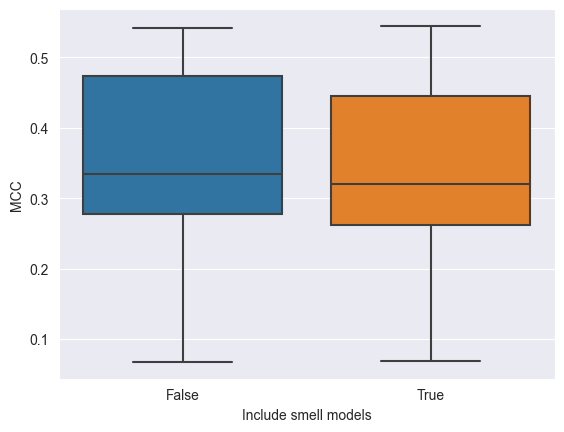

In [80]:
smell_data = results.filter(["real_mcc", "real_precision", "smell_models"])

smells_mcc = sns.boxplot(
    smell_data, y="real_mcc", x="smell_models"
)

smells_mcc.set(xlabel="Include smell models", ylabel="MCC")
smells_mcc.get_figure().savefig("basic_mcc_smells.png")
smells_mcc

<AxesSubplot: xlabel='Include smell models', ylabel='Precision'>

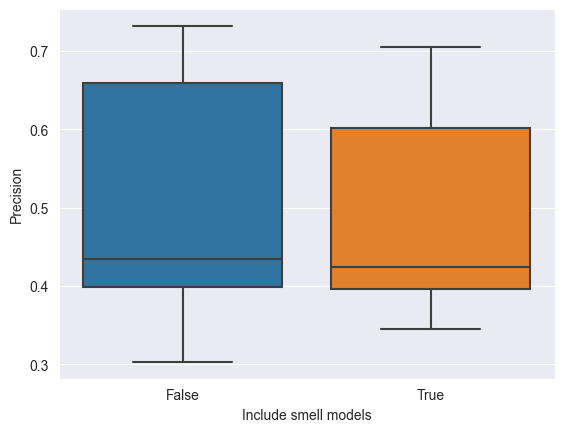

In [81]:
smells_precision = sns.boxplot(
    smell_data, y="real_precision", x="smell_models"
)

smells_precision.set(xlabel="Include smell models", ylabel="Precision")
smells_precision.get_figure().savefig("basic_precision_smells.png")
smells_precision

In [82]:
from effect_size_analysis.cliff_delta import cliff_delta


def calculate_cliff_deltas(all_results, column):
    descriptors = all_results[column].unique()
    cds = {}
    descriptors_1 = []
    descriptors_2 = []
    cd_mcc = []
    cd_mcc_min = []
    cd_mcc_max = []
    cd_prec = []
    cd_prec_min = []
    cd_prec_max = []

    descriptors_count = len(descriptors)
    for i in range(descriptors_count):
        item_1 = results[results[column] == descriptors[i]]
        for j in range(i + 1, descriptors_count):
            item_2 = results[results[column] == descriptors[j]]
            descriptors_1.append(descriptors[i])
            descriptors_2.append(descriptors[j])
            cd_mcc_curr = cliff_delta(item_1["real_mcc"], item_2["real_mcc"], alpha=0.05, accurate_ci=True)
            cd_mcc.append(cd_mcc_curr[0])
            cd_mcc_min.append(cd_mcc_curr[1][0])
            cd_mcc_max.append(cd_mcc_curr[1][1])
            cd_prec_curr = cliff_delta(item_1["real_precision"], item_2["real_precision"], alpha=0.05, accurate_ci=True)
            cd_prec.append(cd_prec_curr[0])
            cd_prec_min.append(cd_prec_curr[1][0])
            cd_prec_max.append(cd_prec_curr[1][1])
    return pd.DataFrame(
        {"descriptor_1": descriptors_1, "descriptor_2": descriptors_2, "CD MCC min": cd_mcc_min, "CD MCC": cd_mcc,
         "CD MCC max": cd_mcc_max, "CD precision min": cd_prec_min, "CD precision": cd_prec,
         "CD precision max": cd_prec_max})


In [83]:

calculate_cliff_deltas(results, "model_type")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,basic-linear-ridge,unscaled-linear,-0.104294,0.001231,0.106729,-0.099656,0.005925,0.111374
1,basic-linear-ridge,basic-randomforest,-0.699826,-0.624236,-0.534819,-0.402951,-0.303723,-0.197438
2,basic-linear-ridge,unscaled-randomforest,-0.712592,-0.639115,-0.551769,-0.423890,-0.325159,-0.218792
3,basic-linear-ridge,unscaled-decisiontree,-0.525021,-0.417821,-0.297570,-0.119241,-0.008041,0.103358
4,basic-linear-ridge,basic-adaboost,-0.277509,-0.173323,-0.065107,-0.038067,0.069444,0.175367
5,basic-linear-ridge,basic-gradientboost,-0.324698,-0.223684,-0.117625,-0.142782,-0.034588,0.074424
6,basic-linear-ridge,unscaled-XGB,-0.572399,-0.415936,-0.230247,-0.331698,-0.128841,0.085405
7,basic-linear-ridge,unscaled-LGBM,-0.511763,-0.336809,-0.135032,-0.295757,-0.081608,0.140350
8,basic-linear-ridge,unscaled-catboost-05,-0.575168,-0.478070,-0.367689,-0.309454,-0.180071,-0.044141
9,unscaled-linear,basic-randomforest,-0.699693,-0.624077,-0.534635,-0.404157,-0.304954,-0.198659


In [84]:

calculate_cliff_deltas(results, "metric_set")

L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:94: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 - ci_size) / denom_corretion,
L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:95: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 + ci_size) / denom_corretion,


,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,all-non-null-numeric,javametrics2-product,0.964693,0.977405,0.985574,NaN,1.000000,NaN
1,all-non-null-numeric,javametrics2-process,0.874588,0.913286,0.940423,0.998992,0.999812,0.999965
2,all-non-null-numeric,javametrics-numeric,0.950670,0.967941,0.979229,NaN,1.000000,NaN
3,all-non-null-numeric,javametrics2,0.869689,0.908186,0.935701,NaN,1.000000,NaN
4,all-non-null-numeric,pmd,0.980196,0.987245,0.991796,NaN,1.000000,NaN
5,all-non-null-numeric,pydriller,0.540634,0.606717,0.665358,-0.731148,-0.679504,-0.620116
6,all-non-null-numeric,product,0.979802,0.986982,0.991621,NaN,1.000000,NaN
7,all-non-null-numeric,process,-0.047986,0.023004,0.093763,-0.464653,-0.400900,-0.333012
8,all-non-null-numeric,none,NaN,1.000000,NaN,0.997551,0.999609,0.999938
9,javametrics2-product,javametrics2-process,-0.765696,-0.719255,-0.665354,-0.803720,-0.764062,-0.717644


In [85]:

calculate_cliff_deltas(results, "smell_models")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,False,True,0.045772,0.078535,0.11113,0.010678,0.043006,0.075245
